# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [3]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)

# Separate features and target
X = df.drop(columns="class")
y = df["class"]


   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


y = pd.DataFrame(data=y)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

numerical = X.select_dtypes(include=['int64', 'float64']).columns
standard = StandardScaler()

X_train[numerical] = standard.fit_transform(X_train[numerical])
X_val[numerical]   = standard.transform(X_val[numerical])
X_test[numerical]  = standard.transform(X_test[numerical])

categorical = list(X.columns)
for col in numerical:
    categorical.remove(col)
encoder = OneHotEncoder(sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical])
X_val_encoded   = encoder.transform(X_val[categorical])
X_test_encoded  = encoder.transform(X_test[categorical])

encoded_cols = encoder.get_feature_names_out(categorical)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_val_encoded   = pd.DataFrame(X_val_encoded, columns=encoded_cols, index=X_val.index)
X_test_encoded  = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

X_train = X_train.drop(columns=categorical).join(X_train_encoded)
X_val   = X_val.drop(columns=categorical).join(X_val_encoded)
X_test  = X_test.drop(columns=categorical).join(X_test_encoded)

print(y.value_counts())
# y has 2 answers
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_val = label.transform(y_val)
y_test = label.transform(y_test)

class
<=50K    37155
>50K     11687
Name: count, dtype: int64


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


> **SGD**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model_sgd = Sequential()

model_sgd.add(Dense(64, activation='relu', input_shape=(108,)))

model_sgd.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=0.01)

model_sgd.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
y_train = y_train.astype("int32")
y_val = y_val.astype("int32")
y_test = y_test.astype("int32")

history = model_sgd.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16)

Epoch 1/50


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2137/2137 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8298 - loss: 0.3656 - val_accuracy: 0.8405 - val_loss: 0.3348
Epoch 2/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8498 - loss: 0.3232 - val_accuracy: 0.8470 - val_loss: 0.3219
Epoch 3/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8534 - loss: 0.3155 - val_accuracy: 0.8474 - val_loss: 0.3181
Epoch 4/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8553 - loss: 0.3121 - val_accuracy: 0.8470 - val_loss: 0.3169
Epoch 5/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8559 - loss: 0.3103 - val_accuracy: 0.8472 - val_loss: 0.3155
Epoch 6/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8573 - loss: 0.3092 - val_accuracy: 0.8502 - val_loss: 0.3130
Epoch 7/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.8568 - loss: 0.3082 - val_accuracy: 0.8523 - val_loss: 0.3131
Epoch 8/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8563 - loss: 0.3076 - val_accur

> **SGD With Momentum**

In [6]:
model_momentum = Sequential()

model_momentum.add(Dense(64, activation='relu', input_shape=(108,)))

model_momentum.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=0.01, momentum=0.9)

model_momentum.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model_momentum.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16)

Epoch 1/50


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2137/2137 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8496 - loss: 0.3259 - val_accuracy: 0.8521 - val_loss: 0.3132
Epoch 2/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8546 - loss: 0.3116 - val_accuracy: 0.8523 - val_loss: 0.3144
Epoch 3/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8570 - loss: 0.3086 - val_accuracy: 0.8529 - val_loss: 0.3135
Epoch 4/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8570 - loss: 0.3073 - val_accuracy: 0.8491 - val_loss: 0.3138
Epoch 5/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8571 - loss: 0.3054 - val_accuracy: 0.8549 - val_loss: 0.3116
Epoch 6/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8581 - loss: 0.3042 - val_accuracy: 0.8549 - val_loss: 0.3085
Epoch 7/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8587 - loss: 0.3036 - val_accuracy: 0.8548 - val_loss: 0.3131
Epoch 8/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8587 - loss: 0.3030 - val_accurac

> **ADAM**

In [7]:
from tensorflow.keras.optimizers import Adam

model_adam = Sequential()

model_adam.add(Dense(64, activation='relu', input_shape=(108,)))

model_adam.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model_adam.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model_adam.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16)

Epoch 1/50


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2137/2137 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8477 - loss: 0.3272 - val_accuracy: 0.8504 - val_loss: 0.3142
Epoch 2/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8572 - loss: 0.3083 - val_accuracy: 0.8517 - val_loss: 0.3134
Epoch 3/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8587 - loss: 0.3045 - val_accuracy: 0.8556 - val_loss: 0.3107
Epoch 4/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8592 - loss: 0.3015 - val_accuracy: 0.8511 - val_loss: 0.3154
Epoch 5/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8608 - loss: 0.2994 - val_accuracy: 0.8538 - val_loss: 0.3103
Epoch 6/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8596 - loss: 0.2970 - val_accuracy: 0.8534 - val_loss: 0.3115
Epoch 7/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8623 - loss: 0.2960 - val_accuracy: 0.8552 - val_loss: 0.3087
Epoch 8/50
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - loss: 0.2937 - val_accurac

> **Plain SGD (no momentum) :**
Training accuracy improves slowly.                        
> **SGD with momentum :**
Training accuracy improves faster than plain SGD                 
> **Adam :**
Training accuracy usually rises very quickly

> **Fastest convergence :**  Adam        
> **Best generalization :** SGD with momentum if tuned correctly **OR** plain SGD in general

> becasue Adam uses **Momentum** and **Adaptive learning rates** which helps to Faster convergence.

## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?

> **batch size = 1**

In [8]:
model_adam_1 = Sequential()

model_adam_1.add(Dense(64, activation='relu', input_shape=(108,)))

model_adam_1.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model_adam_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model_adam_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=1)

Epoch 1/50


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 3802/34187 ━━━━━━━━━━━━━━━━━━━━ 27s 915us/step - accuracy: 0.8159 - loss: 0.3875

KeyboardInterrupt: 

> **batch size = 32**

In [ ]:
model_adam_32 = Sequential()

model_adam_32.add(Dense(64, activation='relu', input_shape=(108,)))

model_adam_32.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model_adam_32.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model_adam_32.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

> **batch size = 128**

In [ ]:
model_adam_128 = Sequential()

model_adam_128.add(Dense(64, activation='relu', input_shape=(108,)))

model_adam_128.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model_adam_128.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model_adam_128.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128)

> **batch size = 1024**

In [ ]:
model_adam_1024 = Sequential()

model_adam_1024.add(Dense(64, activation='relu', input_shape=(108,)))

model_adam_1024.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model_adam_1024.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model_adam_1024.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=1024)

> batch size of 1 gives the noisiest gradient updates            
> batch size of 32  is the generally beter because it's smooth enough to train efficiently and noisy enough for generalization.


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


In [9]:
model_large = Sequential()
model_large.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_large.add(Dense(256, activation='relu'))
model_large.add(Dense(128, activation='relu'))
model_large.add(Dense(1, activation='sigmoid'))

model_large.compile(optimizer=Adam(0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

history_large = model_large.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=50,
                                batch_size=32)

Epoch 1/50


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8513 - loss: 0.3224 - val_accuracy: 0.8517 - val_loss: 0.3146
Epoch 2/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8580 - loss: 0.3084 - val_accuracy: 0.8485 - val_loss: 0.3160
Epoch 3/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8608 - loss: 0.3031 - val_accuracy: 0.8504 - val_loss: 0.3103
Epoch 4/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8623 - loss: 0.2953 - val_accuracy: 0.8548 - val_loss: 0.3103
Epoch 5/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8648 - loss: 0.2893 - val_accuracy: 0.8503 - val_loss: 0.3188
Epoch 6/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8687 - loss: 0.2820 - val_accuracy: 0.8567 - val_loss: 0.3181
Epoch 7/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8697 - loss: 0.2741 - val_accuracy: 0.8566 - val_loss: 0.3239
Epoch 8/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8741 - loss: 0.2665 - val_accurac

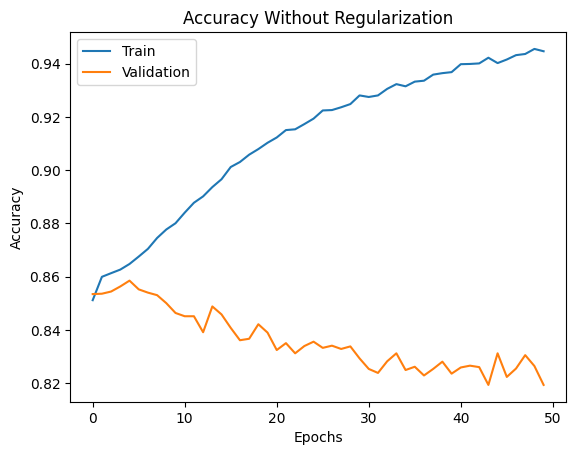

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_large.history['accuracy'], label='Train')
plt.plot(history_large.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Without Regularization');


> this is a clear sign of over fitting as validation is declineing and train is increasing

In [ ]:
from tensorflow.keras.regularizers import l2

model_l2 = Sequential()
model_l2.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],),
                   kernel_regularizer=l2(0.001)))
model_l2.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid'))

model_l2.compile(optimizer=Adam(0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

history_l2 = model_l2.fit(X_train, y_train,
                          validation_data=(X_val, y_val),
                          epochs=50,
                          batch_size=32)

Epoch 1/50


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8507 - loss: 0.4269 - val_accuracy: 0.8504 - val_loss: 0.3450
Epoch 2/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8558 - loss: 0.3359 - val_accuracy: 0.8510 - val_loss: 0.3335
Epoch 3/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8541 - loss: 0.3300 - val_accuracy: 0.8525 - val_loss: 0.3292
Epoch 4/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8560 - loss: 0.3255 - val_accuracy: 0.8455 - val_loss: 0.3387
Epoch 5/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8577 - loss: 0.3225 - val_accuracy: 0.8523 - val_loss: 0.3266
Epoch 6/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8576 - loss: 0.3205 - val_accuracy: 0.8485 - val_loss: 0.3270
Epoch 7/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8590 - loss: 0.3183 - val_accuracy: 0.8540 - val_loss: 0.3205
Epoch 8/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8579 - loss: 0.3173 - val_accurac

In [ ]:
from tensorflow.keras.layers import Dropout

model_dropout = Sequential()
model_dropout.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_dropout.add(Dropout(0.3))  # randomly drop 30% neurons
model_dropout.add(Dense(256, activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(1, activation='sigmoid'))

model_dropout.compile(optimizer=Adam(0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, y_train,
                                    validation_data=(X_val, y_val),
                                    epochs=50,
                                    batch_size=32)

Epoch 1/50


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8486 - loss: 0.3300 - val_accuracy: 0.8507 - val_loss: 0.3135
Epoch 2/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8544 - loss: 0.3144 - val_accuracy: 0.8521 - val_loss: 0.3148
Epoch 3/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8576 - loss: 0.3103 - val_accuracy: 0.8551 - val_loss: 0.3108
Epoch 4/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8583 - loss: 0.3056 - val_accuracy: 0.8543 - val_loss: 0.3125
Epoch 5/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8609 - loss: 0.3019 - val_accuracy: 0.8569 - val_loss: 0.3131
Epoch 6/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8617 - loss: 0.2992 - val_accuracy: 0.8563 - val_loss: 0.3153
Epoch 7/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8630 - loss: 0.2951 - val_accuracy: 0.8558 - val_loss: 0.3152
Epoch 8/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8645 - loss: 0.2901 - val_accurac

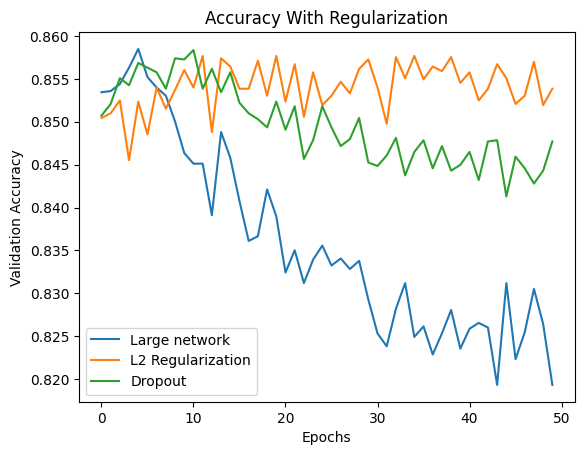

In [ ]:
plt.plot(history_large.history['val_accuracy'], label='Large network')
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Accuracy With Regularization');


> from the graph **L2 Regularization** is better than **dropout**

## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

In [10]:
# we will use model_large as base to save time
from tensorflow.keras.callbacks import EarlyStopping
model_large_early_stop = Sequential()
model_large_early_stop.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_large_early_stop.add(Dense(256, activation='relu'))
model_large_early_stop.add(Dense(128, activation='relu'))
model_large_early_stop.add(Dense(1, activation='sigmoid'))

model_large_early_stop.compile(optimizer=Adam(0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3,min_delta=0.1, restore_best_weights=True)

history_large_early_stop = model_large_early_stop.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,batch_size=32, callbacks=[early_stopping])


Epoch 1/50


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8489 - loss: 0.3228 - val_accuracy: 0.8503 - val_loss: 0.3153
Epoch 2/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8575 - loss: 0.3083 - val_accuracy: 0.8519 - val_loss: 0.3097
Epoch 3/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8597 - loss: 0.3009 - val_accuracy: 0.8545 - val_loss: 0.3096
Epoch 4/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8625 - loss: 0.2954 - val_accuracy: 0.8544 - val_loss: 0.3120


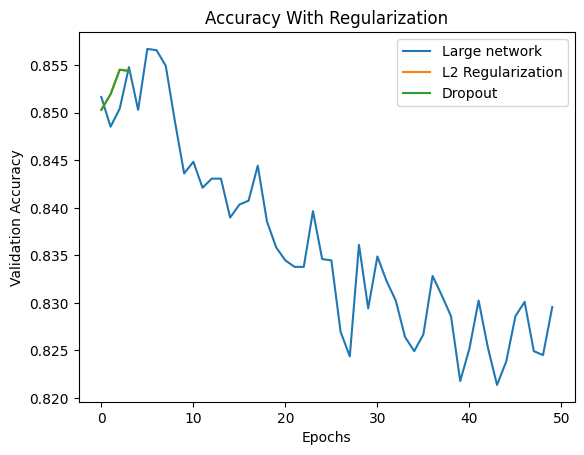

In [14]:
import matplotlib.pyplot as plt
plt.plot(history_large.history['val_accuracy'], label='Large network')
plt.plot(history_large_early_stop.history['val_accuracy'], label='L2 Regularization')
plt.plot(history_large_early_stop.history['val_accuracy'], label='Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Accuracy With Regularization');


> we can see that early stooping is much more faster and better without early stopping as it stops the training once the validation loss is relativly the same

## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?